In [1]:
import explore_tide_table as ex
import testFourier as ts
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit

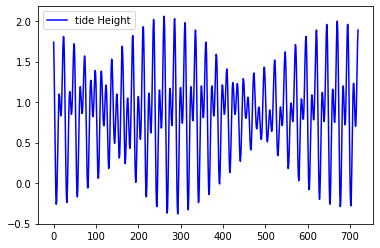

In [276]:
ex.plotTides()

[2.55423706 1.35190947 0.47450618]


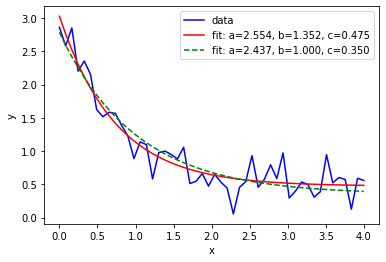

In [277]:
ex.curveFit()

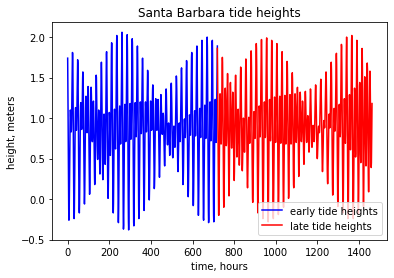

In [278]:
run explore_tide_table

In [279]:
def absFFT(times, testFunction):
    dataNum = len(testFunction)
    amplitudes = np.fft.fft(testFunction)/dataNum #normalize data
    freqs = np.fft.fftfreq(times.shape[-1], times[1]-times[0]) #all the possible frequencies
    #shape is similar to len() for 1D case
    #times[1]-times[0] is the time interval between two data
    return abs(freqs), np.square(abs(amplitudes))

In [280]:
times=np.linspace(0,10,2000)
np.fft.fftfreq(2000, 10/2000-0)
#times[1999]
#abs(np.fft.fftfreq(times.shape[-1], times[1]-times[0]))

array([ 0. ,  0.1,  0.2, ..., -0.3, -0.2, -0.1])

In [281]:
def testFourier():
    times = np.linspace(0,10,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin(times * f2 * 2 * np.pi))
    frequencies,powerSpectrum = absFFT(times,testFunction)
    
    plt.figure()
    plt.subplot(211)
    plt.plot(times,testFunction, 'g-', label='test Function')
    plt.xlabel('time, seconds')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequencies,powerSpectrum, 'b-',label='fourier transform. Should have peaks at 12 and 20')
    plt.xlabel('frequency, Hz')
    plt.legend()

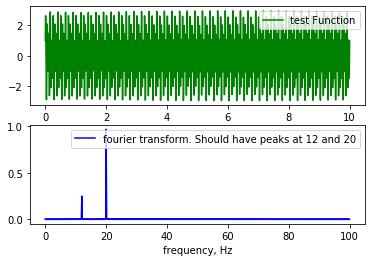

In [282]:
testFourier()

In [283]:
def printFirstTen(arr):
    i=10
    for x in arr:
        i-=1
        print(x)
        if i<0:
            break

In [284]:
def getFourierComponent(times,testFunction,f):
    sinwave = testFunction*np.sin(2*np.pi*f*times) /len(times)
    coswave = testFunction*np.cos(2*np.pi*f*times) /len(times)
    sinAmp = np.sum(sinwave)
    cosAmp = np.sum(coswave)
    return sinAmp, cosAmp
    '''
    deltaTime = times[1]-times[0]
    t = len(times)
    sinAmp = 0
    cosAmp = 0
    while t>0:
        t-=1
        sinAmp += testFunction[t] * np.sin(f * 2 * np.pi * times[t]) * deltaTime
        cosAmp += testFunction[t] * np.cos(f * 2 * np.pi * times[t]) * deltaTime
    return [sinAmp*2, cosAmp*2]
    '''

In [285]:
def overlayFourier():
    times = np.linspace(0,1,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin((times * f2 * 2 * np.pi) + 1))
    #frequencies,powerSpectrum = absFFT(times,testFunction)
    
    f = 20 
    sinAmp,cosAmp = getFourierComponent(times,testFunction,f)
    fitData = 2*sinAmp * np.sin(f * 2 * np.pi * times) + 2*cosAmp * np.cos(f * 2 * np.pi * times)

    plt.figure()
    plt.plot(times,testFunction, 'b-', label='test Function')
    plt.plot(times,fitData, 'g-', label='best fit at %d Hz'%f)
    plt.xlabel('time, seconds')
    plt.legend()

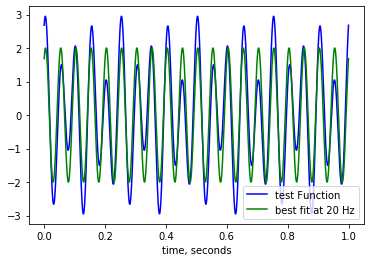

In [286]:
overlayFourier()

In [287]:
def absSlowFT(times, testFunction):
    dataNum = len(testFunction)
    freqs = np.fft.fftfreq(times.shape[-1], times[1]-times[0])
    amplitudes = []
    for f in freqs:
        sinAmp, cosAmp = getFourierComponent(times,testFunction,f)
        #theAmp = np.sqrt(sinAmp**2 + cosAmp**2)*1000 #np.sqrt(sinAmp**2+cosAmp**2)
        #theAngle = cosAmp*1000 #-sinAmp*1000j
        amplitudes.append((cosAmp-sinAmp*1j))
    ampResult = np.array(amplitudes, np.complex128)
    freqs = np.fft.fftfreq(times.shape[-1], times[1]-times[0])
    return [abs(freqs), np.square(np.abs(amplitudes))]

In [288]:
times = np.linspace(0,10,2000)
testFunction = np.cos(times * 12 * 2 * np.pi) + (2*np.sin((times * 20 * 2 * np.pi) + 1))
type(np.fft.fft(testFunction))
#printFirstTen(absFFT(times, testFunction)[1])
#plt.plot(times,absSlowFT(times, testFunction)[-1], 'b-')
#plt.plot(times,absFFT(times, testFunction)[-1], 'r--')
#printFirstTen(np.fft.fft(testFunction).imag)

numpy.ndarray

In [289]:
def testFourier2():
    times = np.linspace(0,10,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin(times * f2 * 2 * np.pi))
    frequencies,powerSpectrum = absFFT(times,testFunction)
    frequencies2,powerSpectrum2 = absSlowFT(times,testFunction)
    
    plt.figure()
    plt.subplot(211)
    plt.plot(frequencies2,powerSpectrum2, 'r-',label='fourier transform. Should have peaks at 12 and 20')
    plt.xlabel('frequency2, Hz')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequencies,powerSpectrum, 'b--',label='fourier transform. Should have peaks at 12 and 20')
    plt.xlabel('frequency, Hz')
    plt.legend()

[0.      0.09995 0.1999  ... 0.29985 0.1999  0.09995]
[1.79954440e-06 1.79969924e-06 1.80016390e-06 ... 1.80093877e-06
 1.80016390e-06 1.79969924e-06]


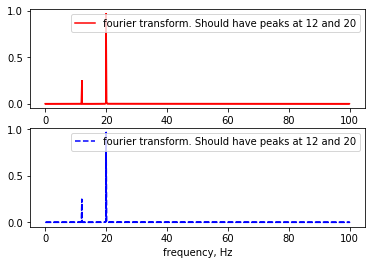

In [290]:
printFirstTen(absSlowFT(times, testFunction))
testFourier2()

In [291]:
def loadTides(filename):
    tideEntries = csv.reader(open(filename),delimiter='\t')
    for i in range(14):    #what do the next two lines do? where does that 14 come from?
        next(tideEntries)  #tideEntries is an iterable object. What does this mean?   
    tideHeights = []
    for row in tideEntries:
        tideHeights.append(float(row[3]))
    return(np.asarray(tideHeights))

In [292]:
def plotTidesFourier():
    tideHeights = loadTides('tidetable.txt')
    timeInHours = np.arange(len(tideHeights))
    
    frequencies, powerspectrums = absSlowFT(timeInHours,tideHeights)
    frequencies2, powerspectrums2 = absFFT(timeInHours,tideHeights)
    
    plt.figure()
    plt.plot(timeInHours[1:],tideHeights[1:], 'b-', label='tide Height')
    plt.legend()
    
    plt.figure()
    plt.subplot(211)
    plt.plot(frequencies2[1:], powerspectrums2[1:], 'b-', label='tide Height')
    plt.legend()
    
    plt.figure()
    plt.subplot(212)
    plt.plot(frequencies[1:], powerspectrums[1:], 'r-', label='tide Height')
    plt.legend()
    
    plt.show()

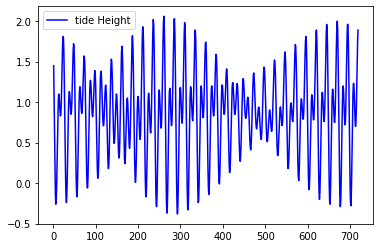

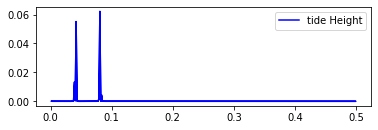

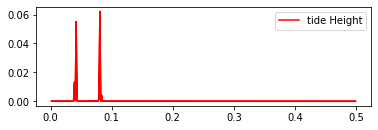

In [293]:
plotTidesFourier()

In [294]:
def curveFit():
    xdata = np.linspace(0, 4, 50)
    y = func(xdata, 2.5, 1.3, 0.5)
    np.random.seed(1729)
    #look at this line, and compare it to what you just did. This is written rather pythonically
    y_noise = 0.2 * np.random.normal(size=xdata.size)
    ydata = y + y_noise
    plt.figure()
    plt.plot(xdata, ydata, 'b-', label='data')
    
    popt, pcov = curve_fit(func, xdata, ydata)
    print(popt)
    
    #QUESTION: What does that * mean? this is a bit advanced. see 
    plt.plot(xdata, func(xdata, *popt), 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
    #print('aa' popt)
    
    plt.plot(xdata, func(xdata, *popt), 'g--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [295]:
def predictNextMonthsTides(currentMonthData):
    tideHeights = loadTides(currentMonthData)
    tideHeights2 = loadTides('tidetable2.txt')
    timeInHours = np.arange(len(tideHeights))
    timeInHours2 = np.arange(len(tideHeights2))
    frequencies,powerSpectrum = absFFT(timeInHours, tideHeights)
    
    plt.plot(timeInHours, tideHeights, 'y+')
    plt.plot(timeInHours2, tideHeights2, 'b-')
    plt.plot(timeInHours, S_ifft, 'g--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [296]:
def predictNextDaysTides(currentDayData):
    return False

NameError: name 'S_ifft' is not defined

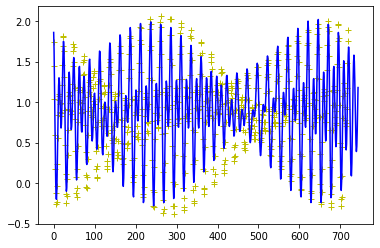

In [297]:
predictNextMonthsTides('tidetable.txt')

In [300]:
def getFreq(times, function):
    freq, power=absSlowFT(times, function)
    freqArr = []
    for t in times:
        if power[t]>0.01:
            freqArr.append(freq[t])
    return freqArr

In [301]:
tideHeights = loadTides('tidetable.txt')
timeInHours = np.arange(len(tideHeights))
getFreq(timeInHours,tideHeights)

[0.0,
 0.03888888888888889,
 0.04166666666666667,
 0.08055555555555556,
 0.08055555555555556,
 0.04166666666666667,
 0.03888888888888889]

In [302]:
def fitfunction(times,A1,A2,A3,A4,A5,A6,const,phase):
    function = const + A1* np.sin(0.08067 * 2*np.pi* times) +A2*np.cos(0.08067 *2*np.pi* times) +A3 * np.sin(0.04172* 2*np.pi * times) +A4 * np.cos(0.04172 *2*np.pi* times) +A5 * np.sin(0.03894* 2*np.pi * times) +A6 * np.cos(0.03894 *2*np.pi* times) 
    return function

def predictNextMonthsTides(filename = 'tidetable.txt',filename2 = 'tidetable2.txt'):
    hours = 24 * 28
    tideHeights = loadTides() 
    tideHeights2 = loadTides(filename2)
    times=[]
    daycounter = 0
    for i in range(0,len(tideHeights)):
        times.append(np.float(daycounter))
        daycounter = daycounter + 1
    times = np.asarray(times)
    predicttimes = []
    for i in range (0, hours):
        predicttimes.append(times[i]+times[-1]+1)
    popt, pcov = curve_fit(fitfunction, times, tideHeights)
    predicttimes = np.asarray(predicttimes)
    fitresult = fitfunction(predicttimes, *popt)
    error = []
    Totalerror = 0
    for i in range (0,hours):
        error.append(tideHeights[i]-tideHeights2[i])
        Totalerror += np.abs(tideHeights[i]-tideHeights2[i])**2/hours
    RMSE = np.sqrt(Totalerror)

    
    plt.figure()
    plt.subplot(211)
    plt.plot(predicttimes, fitresult,label='predict result')
    plt.plot(times, tideHeights,label='original data')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(predicttimes, error , label='error, RMS = %.3f' % RMSE)
    plt.legend()
    plt.show()
    #print(times, predicttimes)
    return 0

def predictNextDaysTides(filename = 'tidetable.txt',filename2 = 'tidetable2.txt'):
    hours = 24
    tideHeights = loadTides() 
    tideHeights2 = loadTides(filename2)
    times=[]
    daycounter = 0
    for i in range(0,len(tideHeights)):
        times.append(np.float(daycounter))
        daycounter = daycounter + 1
    times = np.asarray(times)
    predicttimes = []
    for i in range (0, hours):
        predicttimes.append(times[i]+times[-1]+1)
    popt, pcov = curve_fit(fitfunction, times, tideHeights)
    predicttimes = np.asarray(predicttimes)
    fitresult = fitfunction(predicttimes, *popt)
    error = []
    Totalerror = 0
    for i in range (0,hours):
        error.append(tideHeights[i]-tideHeights2[i])
        Totalerror += np.abs(tideHeights[i]-tideHeights2[i])**2/hours
    RMSE = np.sqrt(Totalerror)

    
    plt.figure()
    plt.subplot(211)
    plt.plot(predicttimes, fitresult,label='predict result')
    plt.plot(times, tideHeights,label='original data')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(predicttimes, error , label='error, RMS = %.3f' % RMSE)
    plt.legend()
    plt.show()
    #print(times, predicttimes)
    return 0

predictNextMonthsTides()
predictNextDaysTides()

TypeError: loadTides() missing 1 required positional argument: 'filename'

In [268]:
#from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# see excellent documentation there

import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit

def loadTides(filename = 'tidetable.txt'):
    tideEntries = csv.reader(open(filename),delimiter='\t')
    for i in range(14):    #what do the next two lines do? where does that 14 come from?
        next(tideEntries)  #tideEntries is an iterable object. What does this mean?
    tideHeights=[]
    for row in tideEntries:
        tideHeights.append(np.float(row[3]))
    return tideHeights

def plotTides():
    tideHeights = loadTides()
    timeInHours = np.arange(len(tideHeights))
    plt.figure()
    plt.plot(timeInHours,tideHeights, 'b-', label='tide Height')
    plt.legend()
    plt.show()
    
def plotTwoTides():
    earlyTideHeights = loadTides('tidetable.txt')
    earlyTimeInHours = np.arange(len(earlyTideHeights))
    lateTideHeights = loadTides('tidetable2.txt')
    lateTimeInHours = np.arange(len(lateTideHeights)) + earlyTimeInHours.max()
    plt.figure()
    plt.plot(earlyTimeInHours,earlyTideHeights, 'b-', label='early tide heights')
    plt.plot(lateTimeInHours,lateTideHeights, 'r-', label='late tide heights')
    plt.xlabel('time, hours')
    plt.ylabel('height, meters')
    plt.title('Santa Barbara tide heights')
    plt.legend()
    plt.show()
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def curveFit():
    xdata = np.linspace(0, 4, 50)
    y = func(xdata, 2.5, 1.3, 0.5)
    np.random.seed(1729)
    #look at this line, and compare it to what you just did. This is written rather pythonically
    y_noise = 0.2 * np.random.normal(size=xdata.size)
    ydata = y + y_noise
    plt.figure()
    plt.plot(xdata, ydata, 'b-', label='data')
    
    popt, pcov = curve_fit(func, xdata, ydata)
    print(popt)
    
    #QUESTION: What does that * mean? this is a bit advanced. see https://treyhunner.com/2018/10/asterisks-in-python-what-they-are-and-how-to-use-them/#:~:text=will%20be%20raised.-,Asterisks%20for%20packing%20arguments%20given%20to%20function,arguments%20given%20to%20the%20function.&text=Python's%20print%20and%20zip%20functions%20accept%20any%20number%20of%20positional%20arguments.
    plt.plot(xdata, func(xdata, *popt), 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
    #print('aa' popt)
    
    plt.plot(xdata, func(xdata, *popt), 'g--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def absFFT(times, amplitude):
    result = np.abs(np.fft.fft(amplitude))/len(times)
    freq = len(times)/times[-1]*np.abs(np.fft.fftfreq(len(times)))
    return  freq, result

def testFourier():
    times = np.linspace(0,10,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin(times * f2 * 2 * np.pi))
    frequencies,powerSpectrum = absFFT(times,testFunction)
    
    plt.figure()
    plt.subplot(211)
    plt.plot(times,testFunction, 'g-', label='test Function')
    plt.xlabel('time, seconds')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequencies,powerSpectrum, 'b-',label='fourier transform. Should have peaks at 12 and 20')
    plt.xlabel('frequency, Hz')
    plt.legend()
    

def getFourierComponent(times,data,f):
    sinwave = 2 * data * np.sin(2 * np.pi * f * times)  / len(times)
    coswave = 2 * data * np.cos(2* np.pi * f *  times)  / len(times)
    sinAmp = np.sum(sinwave)
    cosAmp = np.sum(coswave)
    return sinAmp, cosAmp

def absSlowFT(times, amplitude):
    freq = np.linspace(0, 100, len(times))
    result = []
    for i in freq:
        sinAmp, cosAmp = getFourierComponent(times, amplitude, i)
        result.append(np.abs(sinAmp/2 + cosAmp/2))
    return freq, result
    
def overlayFourier():
    times = np.linspace(0,1,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin((times * f2 * 2 * np.pi) + 1))
    frequencies,powerSpectrum = absFFT(times,testFunction)
    
    f = 20 
    sinAmp,cosAmp = getFourierComponent(times,testFunction,f)
    fitData = sinAmp * np.sin(f * 2 * np.pi * times) + cosAmp * np.cos(f * 2 * np.pi * times)

    plt.figure()
    plt.plot(times,testFunction, 'b-', label='test Function')
    plt.plot(times,fitData, 'g-', label='best fit at %d Hz'%f)
    plt.xlabel('time, seconds')
    plt.legend()

def plotTidesFourier():
    data = loadTides()
    timeInHours = np.arange(len(data))
    frequencies, powerSpectrum = absFFT(timeInHours, data)
    powerSpectrum[0] = 0
    #sinAmp,cosAmp = getFourierComponent(timeInHours,data,f)
    #fitData = sinAmp * np.sin(f * 2 * np.pi * times) + cosAmp * np.cos(f * 2 * np.pi * times) 
    plt.figure()
    plt.subplot(211)
    plt.plot(timeInHours, data, 'g-', label='tidewave')
    
    plt.xlabel('time, seconds')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequencies, powerSpectrum, 'b-',label='fourier transform.')
    plt.xlabel('frequency, Hz')
    plt.legend()
    
    return 0